<a href="https://colab.research.google.com/github/saurabhaloneai/Pytorch-complete/blob/main/pytorch_day_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training Neural Network in Pytorch -- Classification


In [425]:
import sklearn
import torch
import torch.nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [426]:
from sklearn.datasets import make_circles

n_samples = 1000

X , y = make_circles(n_samples,noise=0.03, random_state=42 )

len(X), len(y)

(1000, 1000)

In [427]:
#see

print(X[:10])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]]


In [428]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [429]:
#converting into dataframe

Data = pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"Label":y})
Data

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


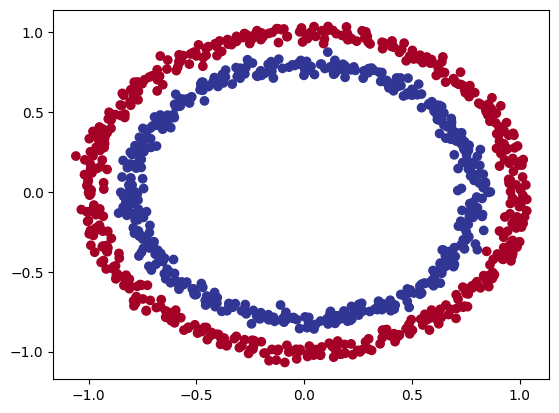

In [430]:
#Visualise

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [431]:
#converting data into tensor

#X = torch.from_numpy(X).type(torch.float)

#y = torch.from_numpy(y).type(torch.float)

#alternate way

X = torch.from_numpy(X.astype('float32'))
y = torch.from_numpy(y.astype('float32'))

X,y

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         ...,
         [-0.1369, -0.8100],
         [ 0.6704, -0.7675],
         [ 0.2811,  0.9638]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
         1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
         0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
         1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
         0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
         1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,


In [432]:
#splitting in train and tesing split

# train_split = int((80 *1000 )/ 100)
# X_train,y_train =X[:train_split], y[:train_split]
# X_test , y_test = X[train_split:],y[train_split:]
# len(X_train),len(y_train),len(X_test),len(y_test)

In [433]:
#X_train[0]

In [434]:
#type(X),type(y),X.dtype

In [435]:
# Or by using sk-learn
from sklearn.model_selection import train_test_split

X_train,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)



In [436]:
len(X_train),len(y_train),len(X_test),len(y_test)

(800, 800, 200, 200)

## Step - 2 Building the nn model for classification

In [437]:
import torch
from torch import nn

#device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [438]:
#Building

class CircleModel0(nn.Module):
  def __init__(self):
    super().__init__()

# 2 inpiut : 5 Neuron : 1 out

    self.layer_1 = nn.Linear(in_features=2,out_features = 5)
    self.layer_2 = nn.Linear(in_features=5,out_features=3)
    self.layer_3= nn.Linear(in_features=3,out_features=1)

  def forward(self,x)  :

    return self.layer_3(self.layer_2(self.layer_1(x)))

model_2 = CircleModel0().to(device)
model_2


CircleModel0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=3, bias=True)
  (layer_3): Linear(in_features=3, out_features=1, bias=True)
)

In [439]:
#alternative way of defining our model but above way is more preffred

# model_12 = nn.Sequential(
#     nn.Linear(in_features=2,out_features =5),
#     nn.Linear(in_features=5,out_features =1)
# )

In [440]:
model_2.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.3079,  0.5065],
                      [-0.6129, -0.7001],
                      [ 0.0390, -0.4129],
                      [ 0.4007,  0.2275],
                      [ 0.2832,  0.1704]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.5854,  0.5155,  0.4844,  0.0670, -0.5735], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.2938, -0.1344, -0.2138,  0.4296,  0.0917],
                      [ 0.2755,  0.1388,  0.4106,  0.3741, -0.1732],
                      [ 0.1808,  0.2767,  0.3911,  0.3769, -0.2366]], device='cuda:0')),
             ('layer_2.bias',
              tensor([-0.3497,  0.1414,  0.0712], device='cuda:0')),
             ('layer_3.weight',
              tensor([[0.5210, 0.1616, 0.5194]], device='cuda:0')),
             ('layer_3.bias', tensor([0.5227], device='cuda:0'))])

In [441]:
# Uisng cross entropy loss function

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)


In [442]:
#acc
# accuracy = (number of correct predictions) / (total number of predictions)

def accuracy(y_true ,y_preds):
  correct = torch.eq(y_true,y_preds).sum().item()
  acc = ( correct / len(y_preds) ) * 100

  return acc


# Training model

In [443]:
model_2.eval()
with torch.inference_mode():
  y_logitis = model_2(X_train.to(device))[:5]
y_logitis


tensor([[0.7245],
        [0.7345],
        [0.5165],
        [0.5263],
        [0.5685]], device='cuda:0')

In [444]:
y_preds_probs = torch.sigmoid(y_logitis)
y_preds_probs

tensor([[0.6736],
        [0.6758],
        [0.6263],
        [0.6286],
        [0.6384]], device='cuda:0')

In [445]:
y_preds = torch.round(y_preds_probs)

In [446]:
y_train = y_train.squeeze()
y_train.shape , y_train.type

(torch.Size([800]), <function Tensor.type>)

In [447]:
##Training loop

epoch_count = []
train_losss = []
test_losss = []

epochs = 250


#put data to  device

X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)





for epoch in range(epochs):

  model_2.train()

  y_logitis = model_2(X_train.to(device)).squeeze()

  y_pred = torch.round(torch.sigmoid(y_logitis))

  train_loss = loss_fn(y_logitis,y_train)

  acc = accuracy(y_true=y_train,y_preds=y_pred)

  optimizer.zero_grad()

  train_loss.backward()

  optimizer.step()

  with torch.inference_mode():

    y_logitiss = model_2(X_test).squeeze()

    test_pred = torch.round(torch.sigmoid(y_logitiss))

    test_loss = loss_fn(y_logitiss,y_test)

    test_acc = accuracy(y_true=y_test,y_preds=test_pred)

  if epoch % 20 == 0 :
    epoch_count.append(epochs)
    train_losss.append(train_loss)
    test_losss.append(test_loss)
    print(f"Epoch: {epoch} | Train loss: %0.3f | acc: %0.3f | Test loss: %0.3f |test_acc: %0.3f " % (train_loss, acc,test_loss,test_acc))

Epoch: 0 | Train loss: 0.742 | acc: 50.000 | Test loss: 0.741 |test_acc: 50.000 
Epoch: 20 | Train loss: 0.730 | acc: 50.000 | Test loss: 0.730 |test_acc: 50.000 
Epoch: 40 | Train loss: 0.721 | acc: 50.000 | Test loss: 0.722 |test_acc: 50.000 
Epoch: 60 | Train loss: 0.714 | acc: 50.000 | Test loss: 0.716 |test_acc: 50.000 
Epoch: 80 | Train loss: 0.709 | acc: 50.000 | Test loss: 0.711 |test_acc: 50.000 
Epoch: 100 | Train loss: 0.705 | acc: 50.000 | Test loss: 0.708 |test_acc: 50.000 
Epoch: 120 | Train loss: 0.702 | acc: 50.000 | Test loss: 0.706 |test_acc: 50.000 
Epoch: 140 | Train loss: 0.700 | acc: 50.000 | Test loss: 0.704 |test_acc: 50.000 
Epoch: 160 | Train loss: 0.699 | acc: 50.000 | Test loss: 0.703 |test_acc: 50.000 
Epoch: 180 | Train loss: 0.698 | acc: 51.000 | Test loss: 0.702 |test_acc: 51.500 
Epoch: 200 | Train loss: 0.697 | acc: 58.625 | Test loss: 0.701 |test_acc: 57.000 
Epoch: 220 | Train loss: 0.696 | acc: 56.375 | Test loss: 0.700 |test_acc: 51.000 
Epoch: 240

In [448]:
!pip3 install pathlib

In [449]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_function already exist, skipping download")
else:
  print("downloading helper funciton")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py" , "wb") as f:
    f.write(request.content)

# from helper_function import plot_predictions, plot_decision_boundary

helper_function already exist, skipping download


In [450]:
from helper_functions import plot_predictions, plot_decision_boundary

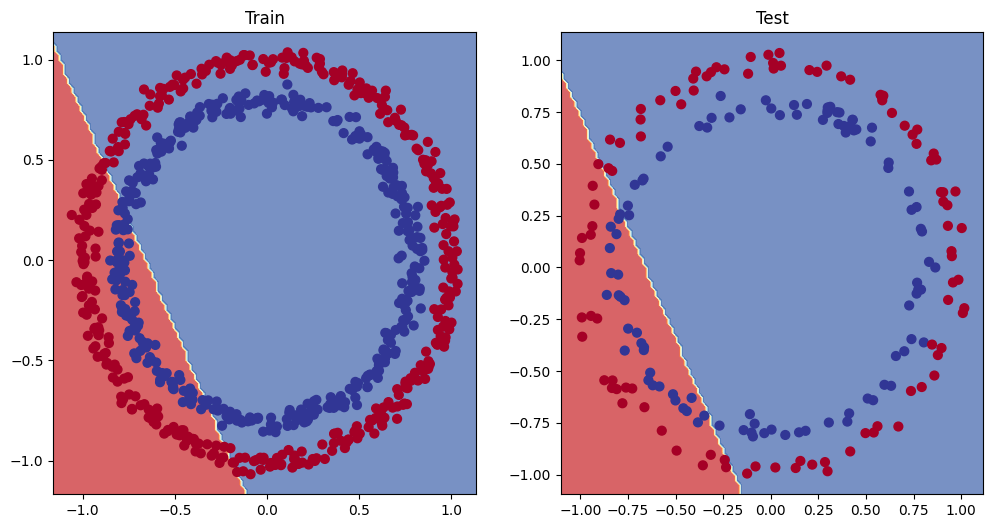

In [451]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2,X_test,y_test)

In [452]:
## Adding non-linearity

class CircleModel0(nn.Module):
  def __init__(self):
    super().__init__()

# 2 inpiut : 5 Neuron : 1 out

    self.layer_1 = nn.Linear(in_features=2,out_features = 10)
    self.layer_2 = nn.Linear(in_features=10,out_features=7)
    self.layer_3= nn.Linear(in_features=7,out_features=1)
    self.relu = nn.ReLU()

  def forward(self,x)  :

    return self.layer_3(self.relu(self.layer_2(self.relu((self.layer_1(x))))))

model_3 = CircleModel0().to(device)
model_3


CircleModel0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=7, bias=True)
  (layer_3): Linear(in_features=7, out_features=1, bias=True)
  (relu): ReLU()
)

In [453]:
list(model_3.parameters())

[Parameter containing:
 tensor([[-0.2388,  0.4190],
         [ 0.4337,  0.4063],
         [ 0.1510, -0.3957],
         [ 0.4231, -0.1410],
         [ 0.6798,  0.2017],
         [ 0.6289,  0.0451],
         [ 0.0445, -0.3821],
         [-0.5581, -0.1990],
         [-0.4843, -0.3332],
         [ 0.7007,  0.3756]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([ 0.4160,  0.4176,  0.1753, -0.3693, -0.4258,  0.2566,  0.5548,  0.3328,
         -0.5986,  0.2307], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([[-0.1229,  0.2197,  0.2791, -0.2476, -0.0713,  0.2632,  0.0995,  0.0610,
           0.2378, -0.0989],
         [-0.0517,  0.1723,  0.0382, -0.1158, -0.0415, -0.0303,  0.0297, -0.2448,
           0.1101, -0.2861],
         [-0.0561,  0.1956, -0.1689, -0.1198, -0.2565, -0.0182,  0.2337,  0.3024,
           0.0913, -0.3083],
         [-0.1911, -0.2318, -0.0112,  0.2681,  0.0823, -0.1324, -0.1770, -0.0640,
           0.1842,  0.0495],
         [ 

In [454]:
#checking about paramters
total_params = sum(
	param.numel() for param in model_3.parameters()
)
trainable_params = sum(
	p.numel() for p in model_3.parameters() if p.requires_grad
)
total_params, trainable_params

(115, 115)

In [455]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model_3.parameters(), lr=0.01)

In [456]:

epoch_count = []
train_losss = []
test_losss = []

epochs = 1000


#put data to  device

X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)





for epoch in range(epochs):

  model_2.train()

  y_logitis = model_3(X_train.to(device)).squeeze()

  y_pred = torch.round(torch.sigmoid(y_logitis))

  train_loss = loss_fn(y_logitis,y_train)

  acc = accuracy(y_true=y_train,y_preds=y_pred)

  optimizer.zero_grad()

  train_loss.backward()

  optimizer.step()

  with torch.inference_mode():

    y_logitiss = model_3(X_test).squeeze()

    test_pred = torch.round(torch.sigmoid(y_logitiss))

    test_loss = loss_fn(y_logitiss,y_test)

    test_acc = accuracy(y_true=y_test,y_preds=test_pred)

  if epoch % 20 == 0 :
    epoch_count.append(epochs)
    train_losss.append(train_loss)
    test_losss.append(test_loss)
    print(f"Epoch: {epoch} | Train loss: %0.3f | acc: %0.3f | Test loss: %0.3f |test_acc: %0.3f " % (train_loss, acc,test_loss,test_acc))

Epoch: 0 | Train loss: 0.701 | acc: 50.000 | Test loss: 0.695 |test_acc: 50.000 
Epoch: 20 | Train loss: 0.677 | acc: 57.000 | Test loss: 0.682 |test_acc: 55.000 
Epoch: 40 | Train loss: 0.629 | acc: 70.250 | Test loss: 0.644 |test_acc: 68.000 
Epoch: 60 | Train loss: 0.503 | acc: 98.625 | Test loss: 0.529 |test_acc: 96.000 
Epoch: 80 | Train loss: 0.303 | acc: 99.875 | Test loss: 0.337 |test_acc: 99.500 
Epoch: 100 | Train loss: 0.141 | acc: 100.000 | Test loss: 0.172 |test_acc: 99.500 
Epoch: 120 | Train loss: 0.063 | acc: 100.000 | Test loss: 0.089 |test_acc: 100.000 
Epoch: 140 | Train loss: 0.028 | acc: 100.000 | Test loss: 0.047 |test_acc: 100.000 
Epoch: 160 | Train loss: 0.017 | acc: 100.000 | Test loss: 0.033 |test_acc: 100.000 
Epoch: 180 | Train loss: 0.012 | acc: 100.000 | Test loss: 0.026 |test_acc: 100.000 
Epoch: 200 | Train loss: 0.008 | acc: 100.000 | Test loss: 0.019 |test_acc: 100.000 
Epoch: 220 | Train loss: 0.006 | acc: 100.000 | Test loss: 0.016 |test_acc: 100.00

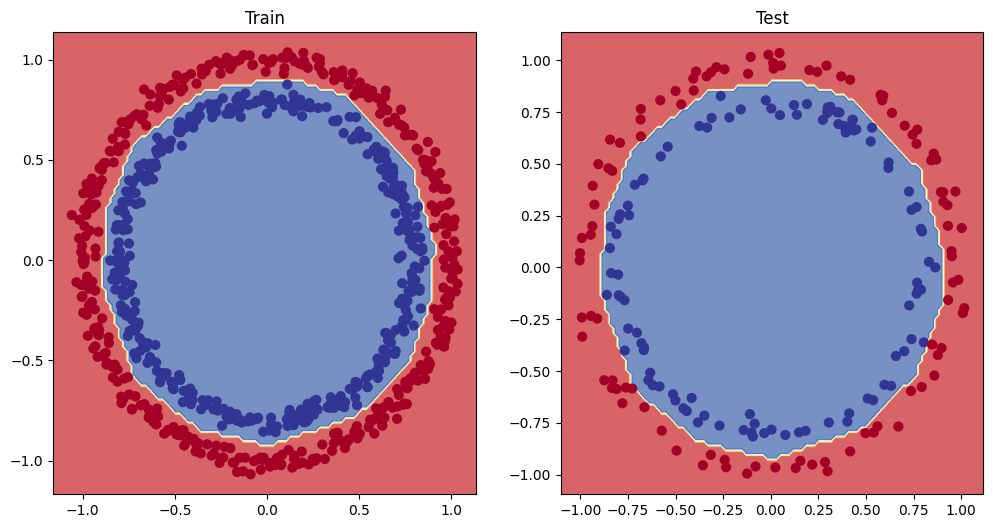

In [457]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)

In [458]:
# Replecting activation function

a = torch.arange(-10,10,1,dtype=torch.float32)
a

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

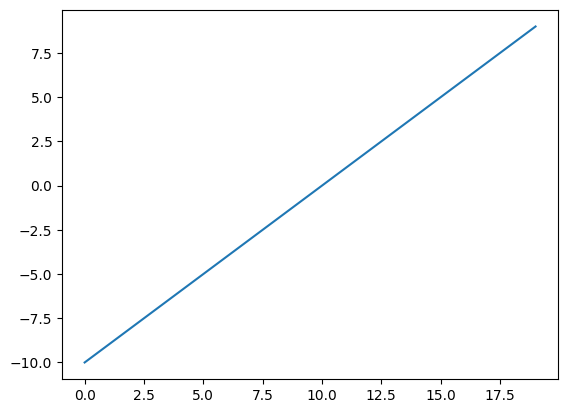

In [459]:
plt.plot(a)


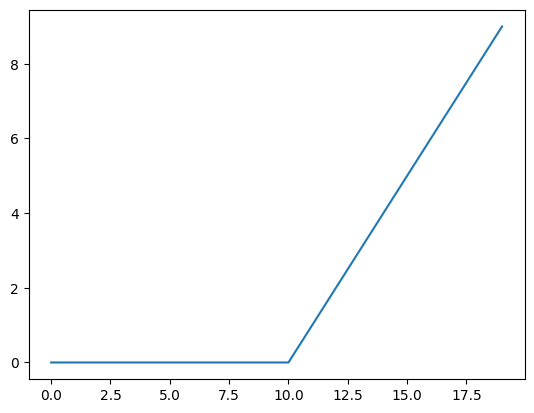

In [460]:
plt.plot(torch.relu(a));

In [461]:
# from scartch

def reluu( x:torch.tensor) -> torch.tensor:

  return torch.maximum(torch.tensor(0),x)



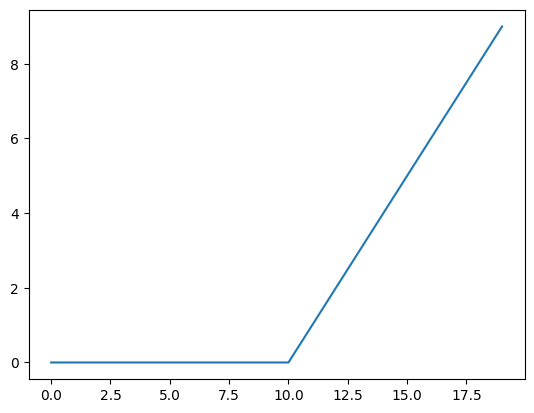

In [462]:
plt.plot(reluu(a));

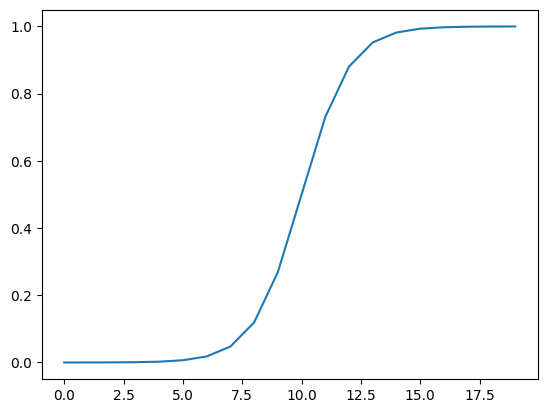

In [463]:
## sigmoid

plt.plot(torch.sigmoid(a))

In [464]:
def segmoid(x:torch.tensor) -> torch.tensor :

  return 1 / (1 + torch.exp(-x))

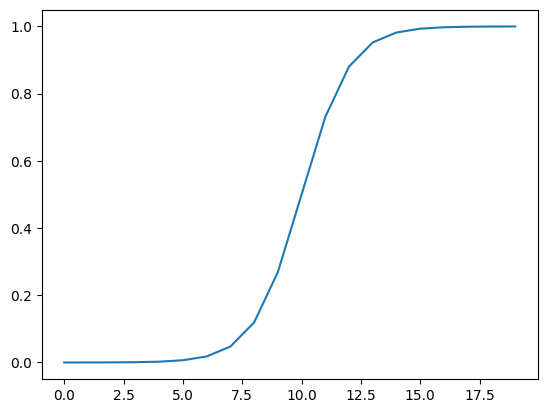

In [465]:
plt.plot(segmoid(a));

#Multiclass- classification

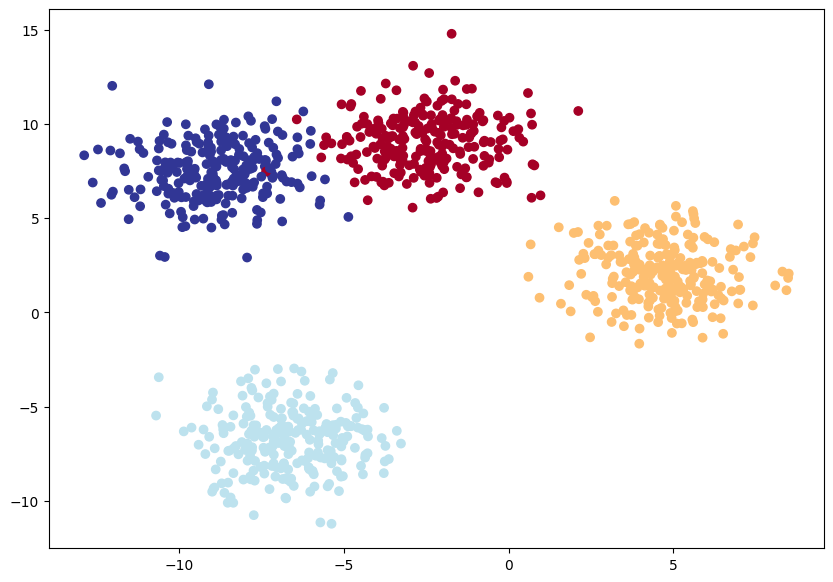

In [517]:

# creating data set

from sklearn.datasets import make_blobs

NUM_CLASSES =4
NUM_FEATURES = 2
RANDOM_SEED = 42

# DATA

X_blob , y_blob = make_blobs(n_samples = 1000,
                             n_features = 2,
                             centers=NUM_CLASSES,
                             cluster_std = 1.5,
                             random_state = RANDOM_SEED)

# trun into tensor

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

#split into train and test

X_train_blob, X_test_blob ,y_train_blob, y_test_blob = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state= RANDOM_SEED)

# visualise

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap =plt.cm.RdYlBu)


In [518]:
# building model for multi class classification

class multiclassification(nn.Module):

  def __init__(self,input_features,output_features,hidden_units=8):

    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features,out_features=hidden_units),

        nn.ReLU(),

        nn.Linear(in_features = hidden_units,out_features=hidden_units),

        nn.ReLU(),

        nn.Linear(in_features = hidden_units,out_features=output_features)

    )

  def forward(self,x)  :

    return self.layer_stack(x)


model_4 = multiclassification(input_features = 2, output_features = 4,hidden_units = 8).to(device)

model_4


multiclassification(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [519]:
list(model_4.state_dict())

['layer_stack.0.weight',
 'layer_stack.0.bias',
 'layer_stack.2.weight',
 'layer_stack.2.bias',
 'layer_stack.4.weight',
 'layer_stack.4.bias']

In [520]:
model_4.eval()

with torch.inference_mode():
  y_blob_logitis = model_4(X_train_blob.to(device))
y_blob_logitis[:10]

tensor([[ 0.6226, -0.4992,  0.3042, -0.2222],
        [ 0.6736, -1.1873,  0.1842, -0.6871],
        [ 0.2130, -0.9997,  0.3891, -1.0923],
        [ 0.4027, -0.7745,  0.4512, -0.8176],
        [ 0.3791, -1.2052,  0.0704, -0.7173],
        [ 0.7800, -0.7957,  0.3113, -0.4282],
        [ 0.4793, -1.4150,  0.0600, -0.8424],
        [ 0.5684, -0.4803,  0.2947, -0.2253],
        [-0.2967, -1.6088, -0.2028, -1.1027],
        [ 0.4331, -1.2987,  0.0692, -0.7724]], device='cuda:0')

In [521]:
y_pred_probs = torch.softmax(y_blob_logitis,dim=1)
y_blob_logitis[:5] , y_pred_probs[5]

(tensor([[ 0.6226, -0.4992,  0.3042, -0.2222],
         [ 0.6736, -1.1873,  0.1842, -0.6871],
         [ 0.2130, -0.9997,  0.3891, -1.0923],
         [ 0.4027, -0.7745,  0.4512, -0.8176],
         [ 0.3791, -1.2052,  0.0704, -0.7173]], device='cuda:0'),
 tensor([0.4692, 0.0971, 0.2936, 0.1402], device='cuda:0'))

In [522]:
torch.sum(y_blob_logitis[0]),torch.sum(y_pred_probs[0])

(tensor(0.2055, device='cuda:0'), tensor(1., device='cuda:0'))

In [523]:
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0,
        2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2,
        0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0,
        0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
        0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0,
        2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2,
        2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2,
        0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2,
        0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
        2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0,
        2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,

In [526]:
loss_fn_blob = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_4.parameters(), lr=0.01)

In [527]:
# Traininig loop


epoch_count = []
train_blob_loss = []
test_blob_loss = []



epochs = 1000

X_train_blob, X_test_blob = X_train_blob.to(device), X_test_blob.to(device)
y_train_blob, y_test_blob = y_train_blob.to(device), y_test_blob.to(device)

for epoch in range(epochs):

  model_4.train()

  y_logits= model_4(X_train_blob)

  y_preds = torch.softmax(y_logits,dim=1).argmax(dim=1)



  loss = loss_fn_blob(y_logits,y_train_blob)

  acc = accuracy(y_true=y_train_blob,y_preds=y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # acc = accuracy(y_true=y_train_blob,y_preds=y_preds)

  model_4.eval()


  with torch.inference_mode():

    y_test_logits = model_4(X_test_blob)

    y_test_preds = torch.softmax(y_test_logits,dim=1).argmax(dim=1)

    test_loss = loss_fn_blob(y_test_logits,y_test_blob)

    test_acc = accuracy(y_true = y_test_blob,y_preds = y_test_preds)

  if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.04734, Acc: 98.88% | Test Loss: 0.03513, Test Acc: 99.00%
Epoch: 10 | Loss: 0.03019, Acc: 99.00% | Test Loss: 0.01967, Test Acc: 99.50%
Epoch: 20 | Loss: 0.02697, Acc: 99.25% | Test Loss: 0.01635, Test Acc: 99.50%
Epoch: 30 | Loss: 0.02561, Acc: 99.12% | Test Loss: 0.01304, Test Acc: 99.50%
Epoch: 40 | Loss: 0.02462, Acc: 99.12% | Test Loss: 0.01268, Test Acc: 99.50%
Epoch: 50 | Loss: 0.02369, Acc: 99.25% | Test Loss: 0.01135, Test Acc: 99.50%
Epoch: 60 | Loss: 0.02276, Acc: 99.38% | Test Loss: 0.01059, Test Acc: 99.50%
Epoch: 70 | Loss: 0.02181, Acc: 99.50% | Test Loss: 0.00999, Test Acc: 99.50%
Epoch: 80 | Loss: 0.02102, Acc: 99.50% | Test Loss: 0.00941, Test Acc: 99.50%
Epoch: 90 | Loss: 0.02030, Acc: 99.50% | Test Loss: 0.00878, Test Acc: 99.50%
Epoch: 100 | Loss: 0.01970, Acc: 99.50% | Test Loss: 0.00821, Test Acc: 99.50%
Epoch: 110 | Loss: 0.01918, Acc: 99.50% | Test Loss: 0.00769, Test Acc: 100.00%
Epoch: 120 | Loss: 0.01875, Acc: 99.50% | Test Loss: 0.00723, 

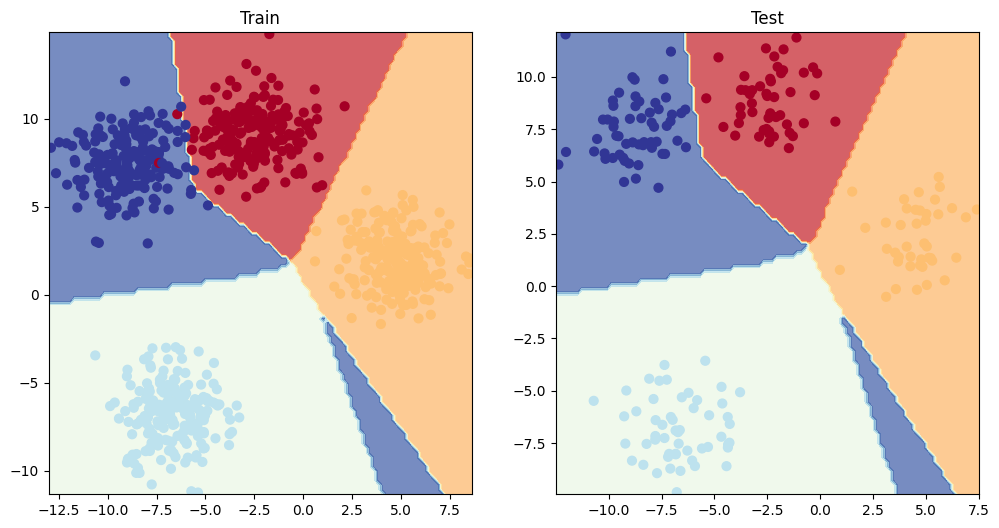

In [528]:
#visualise

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_train_blob, y_train_blob)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_test_blob, y_test_blob)
